# Explore Level 3 data

In [2]:
# onda install -n VizElfs ipykernel --update-deps --force-reinstall
# conda install openpyxl
import pandas as pd

In [3]:
# Level 3 file
df_l3 = pd.read_excel("../data/Level_3.xlsx")

In [4]:
df_l3.head()

,small_area,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,2030,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,sum
0,E01000001,air_quality,reduced_mortality,health,0.003336,0.003663,6.917033e-03,8.674610e-03,1.085301e-02,1.408742e-02,...,6.968484e-02,7.270200e-02,7.526418e-02,7.737418e-02,7.860485e-02,7.868850e-02,7.817872e-02,7.763434e-02,7.710436e-02,1.201945
1,E01000001,air_quality,society,non-health,0.000039,0.000043,8.140000e-05,1.020450e-04,1.276710e-04,1.657200e-04,...,8.197480e-04,8.552410e-04,8.853820e-04,9.102030e-04,9.246800e-04,9.256640e-04,9.196670e-04,9.132640e-04,9.070290e-04,0.014139
2,E01000001,congestion,time_saved,non-health,0.005570,0.009543,1.191381e-02,1.324733e-02,1.365541e-02,1.479793e-02,...,-2.996094e-02,-3.209987e-02,-3.437791e-02,-3.693888e-02,-4.099173e-02,-4.281875e-02,-4.471182e-02,-4.611941e-02,-4.897514e-02,-0.369011
3,E01000001,dampness,NHS,non-health,0.000000,0.000000,1.260000e-05,1.240000e-05,1.240000e-05,2.410000e-06,...,2.970000e-05,3.320000e-05,3.290000e-05,3.200000e-05,3.180000e-05,3.150000e-05,3.150000e-05,3.130000e-05,3.110000e-05,0.000504
4,E01000001,dampness,QALY,health,0.000000,0.000000,3.070000e-07,3.050000e-07,3.030000e-07,5.910000e-08,...,7.260000e-07,8.120000e-07,8.060000e-07,7.830000e-07,7.780000e-07,7.720000e-07,7.710000e-07,7.650000e-07,7.610000e-07,0.000012


In [6]:
df_l3.shape

(928520, 31)

In [11]:
# Lookup file
lookup = pd.read_excel("../data/lookups.xlsx")
lookup.head()

,small_area,population,households,local_authority,Unnamed: 4,nation
0,E01000001,1721,838,City of London,NaN,Eng/Wales
1,E01000002,1608,824,City of London,NaN,Eng/Wales
2,E01000003,1826,1017,City of London,NaN,Eng/Wales
3,E01000005,1605,480,City of London,NaN,Eng/Wales
4,E01000006,1833,554,Barking and Dagenham,NaN,Eng/Wales


In [8]:
## Wales only
df_l3_W = df_l3[df_l3['small_area'].str.startswith('W')]
print(df_l3_W.shape)
df_l3_W.head()

(38340, 31)


,small_area,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,2030,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,sum
890180,W01000003,air_quality,reduced_mortality,health,1.473090e-02,1.667587e-02,1.976664e-02,0.022820,0.025635,0.028700,...,0.099744,0.103847,0.107327,0.110169,0.111805,0.111820,0.110984,0.110105,0.109262,1.810500
890181,W01000003,air_quality,society,non-health,1.732890e-04,1.961690e-04,2.325280e-04,0.000268,0.000302,0.000338,...,0.001173,0.001222,0.001263,0.001296,0.001315,0.001315,0.001306,0.001295,0.001285,0.021298
890182,W01000003,congestion,time_saved,non-health,5.633596e-02,9.711574e-02,1.280483e-01,0.150002,0.163931,0.201899,...,-0.096701,-0.116241,-0.138253,-0.160345,-0.180216,-0.201878,-0.224924,-0.244813,-0.300688,-0.189559
890183,W01000003,dampness,NHS,non-health,1.050000e-08,9.600000e-08,1.910000e-05,0.000058,0.000081,0.000299,...,0.000696,0.000703,0.000765,0.000772,0.000801,0.000805,0.000802,0.000832,0.000857,0.012310
890184,W01000003,dampness,QALY,health,2.580000e-10,2.350000e-09,4.660000e-07,0.000001,0.000002,0.000007,...,0.000017,0.000017,0.000019,0.000019,0.000020,0.000020,0.000020,0.000020,0.000021,0.000301


In [21]:
# join Welsh data + lookup
df_l3_W_lookup = pd.merge(df_l3_W, lookup, how='inner', on='small_area')
# Remove 'Unnamed' and 'nation' columns, move 'local_authority' as first
cols = [col for col in df_l3_W_lookup.columns if col not in ['Unnamed: 4', 'nation']]
cols = ['local_authority'] + [col for col in cols if col != 'local_authority']
df_l3_W_lookup = df_l3_W_lookup[cols]
df_l3_W_lookup.head()


,local_authority,small_area,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,...,2044,2045,2046,2047,2048,2049,2050,sum,population,households
0,Isle of Anglesey,W01000003,air_quality,reduced_mortality,health,1.473090e-02,1.667587e-02,1.976664e-02,0.022820,0.025635,...,0.107327,0.110169,0.111805,0.111820,0.110984,0.110105,0.109262,1.810500,2446,1141
1,Isle of Anglesey,W01000003,air_quality,society,non-health,1.732890e-04,1.961690e-04,2.325280e-04,0.000268,0.000302,...,0.001263,0.001296,0.001315,0.001315,0.001306,0.001295,0.001285,0.021298,2446,1141
2,Isle of Anglesey,W01000003,congestion,time_saved,non-health,5.633596e-02,9.711574e-02,1.280483e-01,0.150002,0.163931,...,-0.138253,-0.160345,-0.180216,-0.201878,-0.224924,-0.244813,-0.300688,-0.189559,2446,1141
3,Isle of Anglesey,W01000003,dampness,NHS,non-health,1.050000e-08,9.600000e-08,1.910000e-05,0.000058,0.000081,...,0.000765,0.000772,0.000801,0.000805,0.000802,0.000832,0.000857,0.012310,2446,1141
4,Isle of Anglesey,W01000003,dampness,QALY,health,2.580000e-10,2.350000e-09,4.660000e-07,0.000001,0.000002,...,0.000019,0.000019,0.000020,0.000020,0.000020,0.000020,0.000021,0.000301,2446,1141


In [22]:
df_l3_W_lookup.to_csv("../data/df_l3_W_lookup.csv", index=False)

In [16]:
print(f"Unique values in local_authority: {df_l3_W_lookup['local_authority'].unique()}")

Unique values in local_authority: ['Isle of Anglesey' 'Gwynedd' 'Conwy' 'Denbighshire' 'Flintshire'
 'Wrexham' 'Powys' 'Ceredigion' 'Pembrokeshire' 'Carmarthenshire'
 'Swansea' 'Neath Port Talbot' 'Bridgend' 'The Vale of Glamorgan'
 'Rhondda Cynon Taf' 'Merthyr Tydfil' 'Caerphilly' 'Blaenau Gwent'
 'Torfaen' 'Monmouthshire' 'Newport' 'Cardiff']


In [17]:
unique_counts = df_l3_W_lookup.groupby('local_authority')['small_area'].nunique()
print(unique_counts)

local_authority
Blaenau Gwent             46
Bridgend                  91
Caerphilly               110
Cardiff                  218
Carmarthenshire          111
Ceredigion                45
Conwy                     71
Denbighshire              58
Flintshire                92
Gwynedd                   71
Isle of Anglesey          41
Merthyr Tydfil            36
Monmouthshire             58
Neath Port Talbot         90
Newport                  100
Pembrokeshire             71
Powys                     79
Rhondda Cynon Taf        153
Swansea                  150
The Vale of Glamorgan     82
Torfaen                   60
Wrexham                   84
Name: small_area, dtype: int64


In [5]:
lookup.head()

,small_area,population,households,local_authority,Unnamed: 4,nation
0,E01000001,1721,838,City of London,NaN,Eng/Wales
1,E01000002,1608,824,City of London,NaN,Eng/Wales
2,E01000003,1826,1017,City of London,NaN,Eng/Wales
3,E01000005,1605,480,City of London,NaN,Eng/Wales
4,E01000006,1833,554,Barking and Dagenham,NaN,Eng/Wales


## Check categorical columns

In [6]:
df_l3.columns

Index([     'small_area', 'co-benefit_type',  'damage_pathway',
           'damage_type',              2025,              2026,
                    2027,              2028,              2029,
                    2030,              2031,              2032,
                    2033,              2034,              2035,
                    2036,              2037,              2038,
                    2039,              2040,              2041,
                    2042,              2043,              2044,
                    2045,              2046,              2047,
                    2048,              2049,              2050,
                   'sum'],
      dtype='object')

In [ ]:
for col in ['co-benefit_type', 'damage_pathway', 'damage_type']:
    print(f"Unique values in {col}: {df_l3[col].unique()}")
    print(f"Count of unique values in {col}: {df_l3[col].nunique()}")

distinct_combinations = df_l3[['co-benefit-type', 'damage_pathway', 'damage_type']].drop_duplicates()
print(f"Total distinct combinations: {len(distinct_combinations)}")
print(distinct_combinations)

Unique values in co-benefit_type: ['air_quality' 'congestion' 'dampness' 'diet_change' 'excess_cold'
 'excess_heat' 'hassle_costs' 'noise' 'physical_activity' 'road_repairs'
 'road_safety']
Count of unique values in co-benefit_type: 11
Unique values in damage_pathway: ['reduced_mortality' 'society' 'time_saved' 'NHS' 'QALY' 'amenity'
 'sleep_disturbance']
Count of unique values in damage_pathway: 7
Unique values in damage_type: ['health' 'non-health']
Count of unique values in damage_type: 2
Total distinct combinations: 20
      co-benefit_type     damage_pathway damage_type
0         air_quality  reduced_mortality      health
1         air_quality            society  non-health
2          congestion         time_saved  non-health
3            dampness                NHS  non-health
4            dampness               QALY      health
5            dampness            society  non-health
6         diet_change  reduced_mortality      health
7         excess_cold                NHS  non-h

In [4]:
import pandas as pd
wimd_url = "https://www.gov.wales/sites/default/files/statistics-and-research/2025-11/wimd-2025-index-and-domain-ranks-by-small-area.ods"
wimd_df = pd.read_excel(wimd_url, engine='odf', 
                        sheet_name='Deciles_quintiles_quartiles'
                        ,skiprows=3)

wimd_df.head()


,LSOA code,LSOA name (Eng),Local Authority name (Eng),WIMD 2025 overall rank,WIMD 2025 overall decile,WIMD 2025 overall quintile,WIMD 2025 overall quartile,WIMD 2025 overall deprivation group
0,W01000003,Amlwch Port,Isle of Anglesey,570,3,2,2,3
1,W01000004,Amlwch Rural,Isle of Anglesey,1132,6,3,3,5
2,W01000005,Beaumaris,Isle of Anglesey,676,4,2,2,4
3,W01000006,Bodffordd,Isle of Anglesey,991,6,3,3,5
4,W01000007,Bodorgan,Isle of Anglesey,1026,6,3,3,5


In [6]:
cardiff_lookup_wimd = pd.read_csv("../data/Cardiff_lookup_wimd.csv")

In [7]:
cardiff_lookup_wimd.head()

,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,2030,2031,...,2049,2050,sum,population,households,LSOA code,LSOA name (Eng),WIMD 2025 overall rank,WIMD 2025 overall decile,WIMD 2025 overall quintile
0,air_quality,reduced_mortality,health,0.003359,5.408322e-03,6.949793e-03,0.008954,0.011502,0.015201,1.941414e-02,...,0.093800,0.093225,1.432637,2064,885,W01001694,Adamsdown 1,189,1,1
1,air_quality,society,non-health,0.000039,6.360000e-05,8.180000e-05,0.000105,0.000135,0.000179,2.283810e-04,...,0.001103,0.001097,0.016853,2064,885,W01001694,Adamsdown 1,189,1,1
2,congestion,time_saved,non-health,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,2064,885,W01001694,Adamsdown 1,189,1,1
3,dampness,NHS,non-health,0.000000,7.190000e-08,1.270000e-07,0.000173,0.000173,0.000055,8.900000e-06,...,0.000278,0.000276,0.004798,2064,885,W01001694,Adamsdown 1,189,1,1
4,dampness,QALY,health,0.000000,1.760000e-09,3.100000e-09,0.000004,0.000004,0.000001,2.180000e-07,...,0.000007,0.000007,0.000117,2064,885,W01001694,Adamsdown 1,189,1,1


/var/folders/pm/9f068dg15csbjk3w6rp3gplm0000gn/T/ipykernel_39643/1313643557.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = cardiff_lookup_wimd.groupby('co-benefit_type').apply(


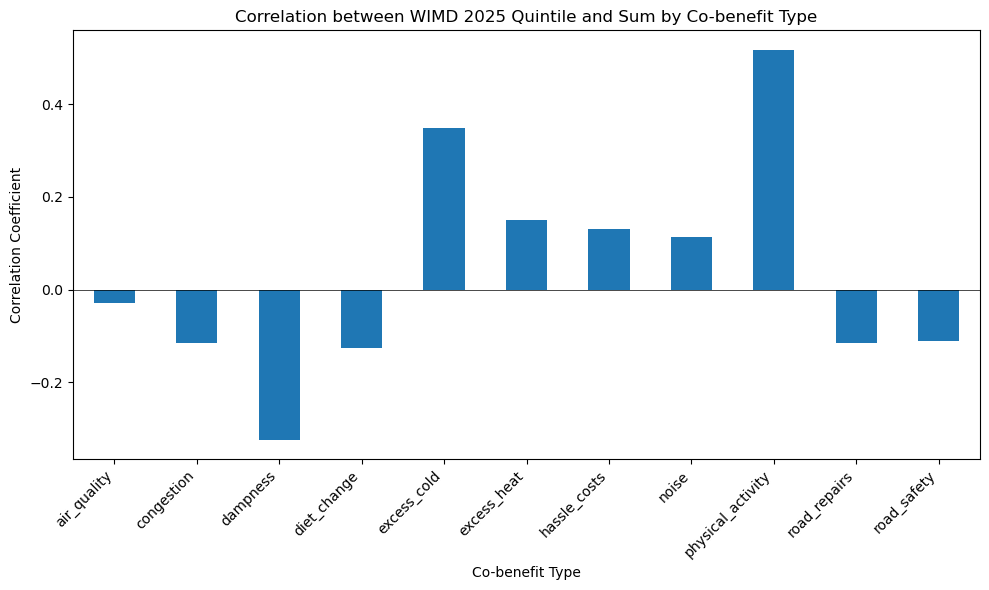

co-benefit_type
air_quality         -0.029497
congestion          -0.114973
dampness            -0.322963
diet_change         -0.124954
excess_cold          0.349165
excess_heat          0.149845
hassle_costs         0.130131
noise                0.113279
physical_activity    0.516833
road_repairs        -0.114973
road_safety         -0.110662
dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations for each co-benefit_type
correlations = cardiff_lookup_wimd.groupby('co-benefit_type').apply(
    lambda x: x[['WIMD 2025 overall quintile', 'sum']].corr().iloc[0, 1]
)

# Create bar plot of correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation between WIMD 2025 Quintile and Sum by Co-benefit Type')
plt.xlabel('Co-benefit Type')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print correlation values
print(correlations)

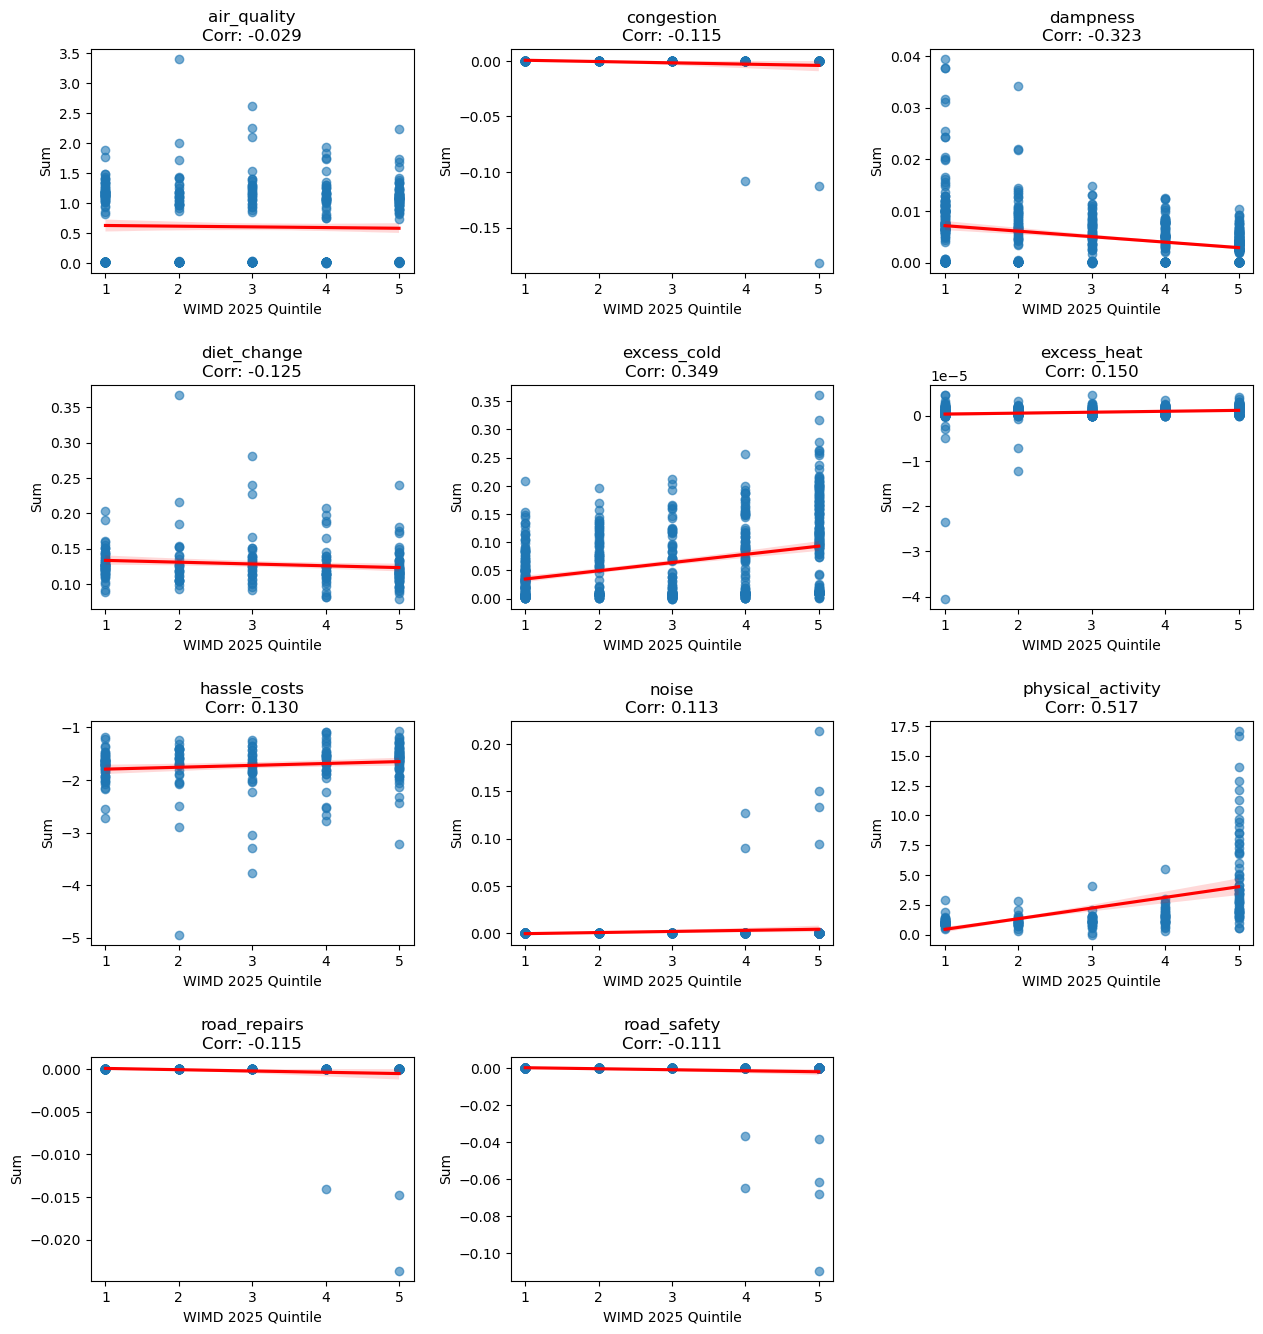

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique co-benefit types
co_benefit_types = cardiff_lookup_wimd['co-benefit_type'].unique()
n_types = len(co_benefit_types)

# Calculate grid dimensions
n_cols = 3
n_rows = (n_types + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, co_benefit in enumerate(co_benefit_types):
    data = cardiff_lookup_wimd[cardiff_lookup_wimd['co-benefit_type'] == co_benefit]
    
    # Scatter plot
    axes[idx].scatter(data['WIMD 2025 overall quintile'], data['sum'], alpha=0.6)
    
    # Add regression line
    sns.regplot(x='WIMD 2025 overall quintile', y='sum', data=data, 
                scatter=False, ax=axes[idx], color='red')
    
    # Calculate and display correlation
    corr = data[['WIMD 2025 overall quintile', 'sum']].corr().iloc[0, 1]
    axes[idx].set_title(f'{co_benefit}\nCorr: {corr:.3f}')
    axes[idx].set_xlabel('WIMD 2025 Quintile')
    axes[idx].set_ylabel('Sum')

# Hide unused subplots
for idx in range(n_types, len(axes)):
    axes[idx].set_visible(False)

# Adjust spacing between rows and columns
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

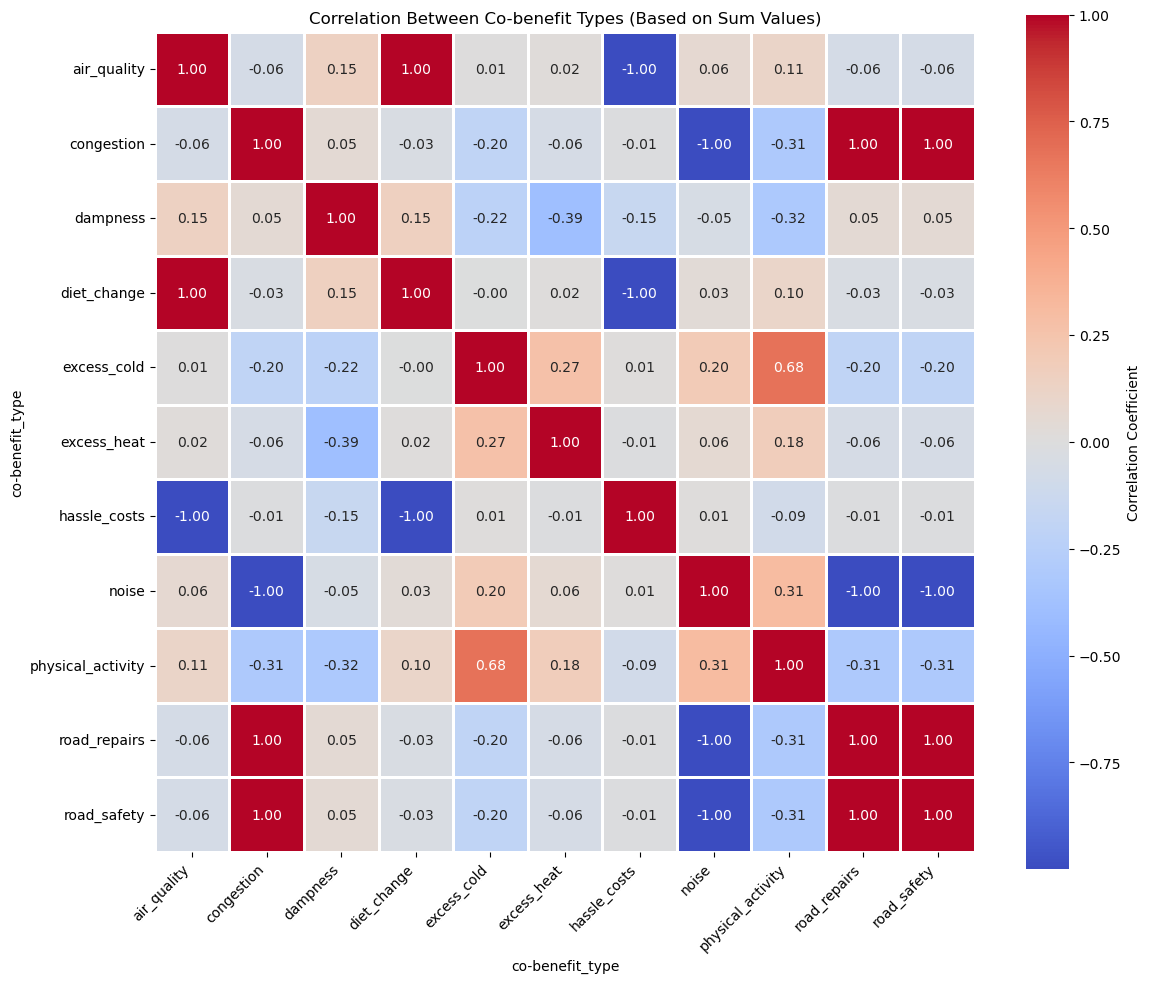

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data to have co-benefit types as columns
pivot_data = cardiff_lookup_wimd.pivot_table(
    values='sum', 
    index=['LSOA code'], 
    columns='co-benefit_type'
)

# Calculate correlation matrix
correlation_matrix = pivot_data.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Between Co-benefit Types (Based on Sum Values)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

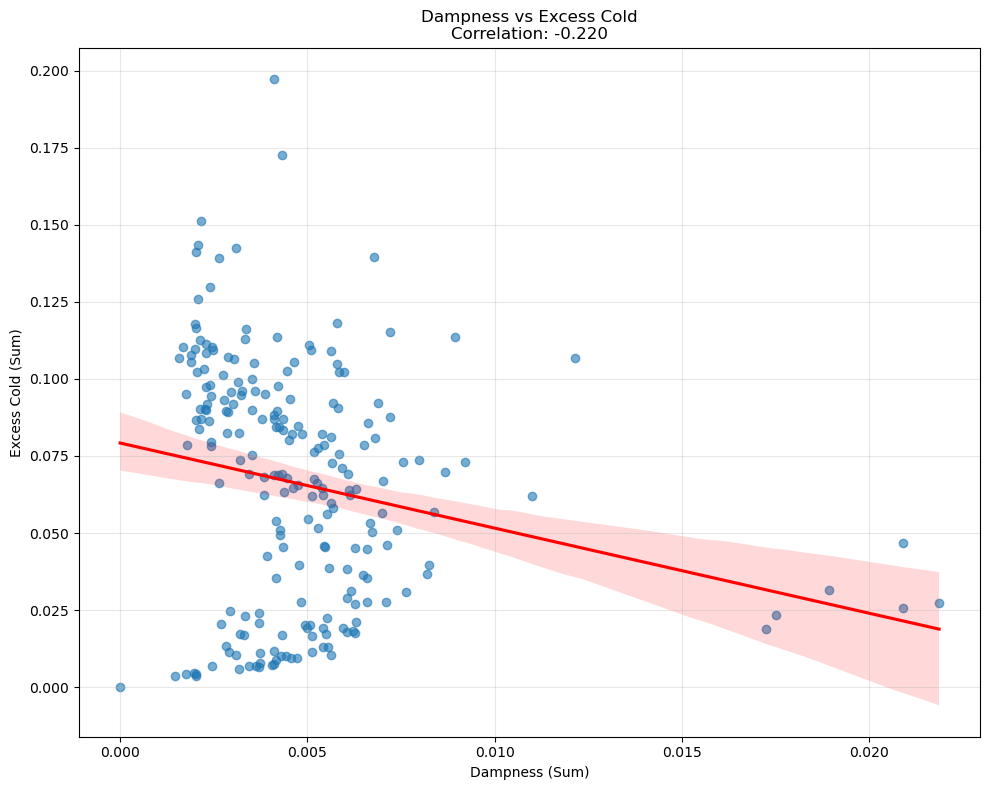

Correlation coefficient: -0.220


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data to get dampness and excess_cold as separate columns
pivot_data = cardiff_lookup_wimd.pivot_table(
    values='sum', 
    index=['LSOA code'], 
    columns='co-benefit_type'
)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pivot_data['dampness'], pivot_data['excess_cold'], alpha=0.6)

# Add regression line
sns.regplot(x='dampness', y='excess_cold', data=pivot_data, 
            scatter=False, color='red')

# Calculate and display correlation
corr = pivot_data[['dampness', 'excess_cold']].corr().iloc[0, 1]
plt.title(f'Dampness vs Excess Cold\nCorrelation: {corr:.3f}')
plt.xlabel('Dampness (Sum)')
plt.ylabel('Excess Cold (Sum)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient: {corr:.3f}")

/var/folders/pm/9f068dg15csbjk3w6rp3gplm0000gn/T/ipykernel_39643/3999853589.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = cardiff_qaly.groupby('co-benefit_type').apply(


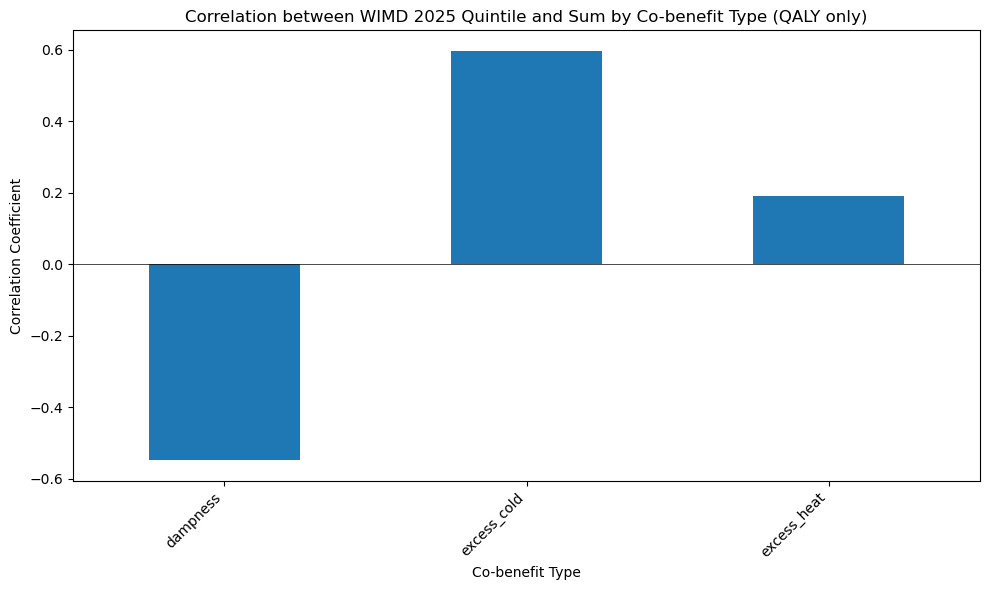

co-benefit_type
dampness      -0.547899
excess_cold    0.596768
excess_heat    0.189980
dtype: float64


In [16]:
## qaly only

import matplotlib.pyplot as plt
import seaborn as sns

# Filter for QALY only
cardiff_qaly = cardiff_lookup_wimd[cardiff_lookup_wimd['damage_pathway'] == 'QALY']

# Calculate correlations for each co-benefit_type
correlations = cardiff_qaly.groupby('co-benefit_type').apply(
    lambda x: x[['WIMD 2025 overall quintile', 'sum']].corr().iloc[0, 1]
)

# Create bar plot of correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation between WIMD 2025 Quintile and Sum by Co-benefit Type (QALY only)')
plt.xlabel('Co-benefit Type')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print correlation values
print(correlations)

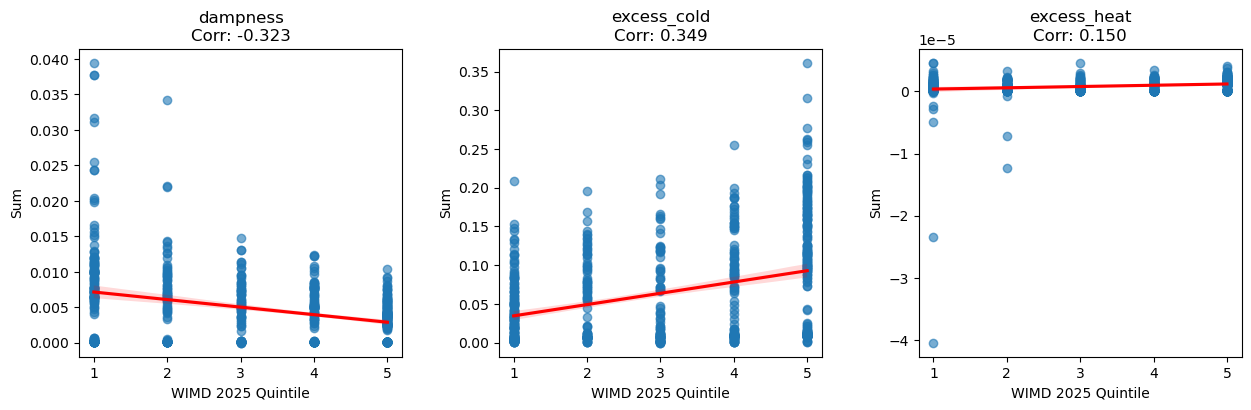

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for QALY only
cardiff_qaly = cardiff_lookup_wimd[cardiff_lookup_wimd['damage_pathway'] == 'QALY']

# Get unique co-benefit types
co_benefit_types = cardiff_qaly['co-benefit_type'].unique()
n_types = len(co_benefit_types)

# Calculate grid dimensions
n_cols = 3
n_rows = (n_types + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, co_benefit in enumerate(co_benefit_types):
    data = cardiff_lookup_wimd[cardiff_lookup_wimd['co-benefit_type'] == co_benefit]
    
    # Scatter plot
    axes[idx].scatter(data['WIMD 2025 overall quintile'], data['sum'], alpha=0.6)
    
    # Add regression line
    sns.regplot(x='WIMD 2025 overall quintile', y='sum', data=data, 
                scatter=False, ax=axes[idx], color='red')
    
    # Calculate and display correlation
    corr = data[['WIMD 2025 overall quintile', 'sum']].corr().iloc[0, 1]
    axes[idx].set_title(f'{co_benefit}\nCorr: {corr:.3f}')
    axes[idx].set_xlabel('WIMD 2025 Quintile')
    axes[idx].set_ylabel('Sum')

# Hide unused subplots
for idx in range(n_types, len(axes)):
    axes[idx].set_visible(False)

# Adjust spacing between rows and columns
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

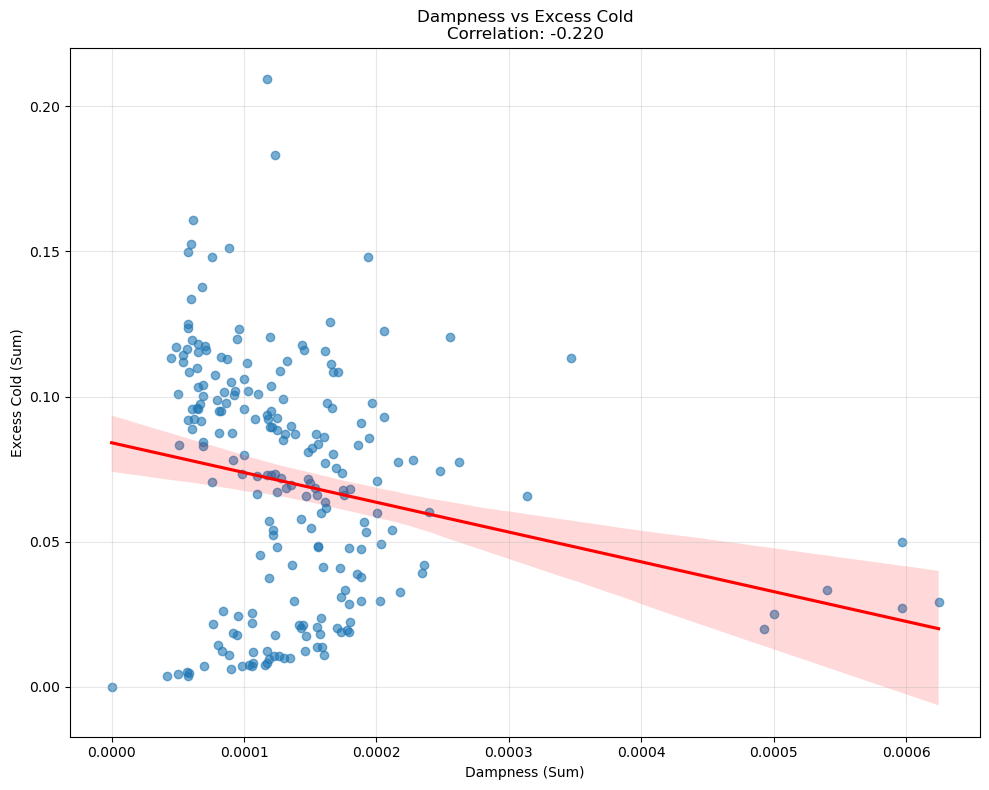

Correlation coefficient: -0.220


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for QALY only
cardiff_qaly = cardiff_lookup_wimd[cardiff_lookup_wimd['damage_pathway'] == 'QALY']


# Pivot the data to get dampness and excess_cold as separate columns
pivot_data = cardiff_qaly.pivot_table(
    values='sum', 
    index=['LSOA code'], 
    columns='co-benefit_type'
)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pivot_data['dampness'], pivot_data['excess_cold'], alpha=0.6)

# Add regression line
sns.regplot(x='dampness', y='excess_cold', data=pivot_data, 
            scatter=False, color='red')

# Calculate and display correlation
corr = pivot_data[['dampness', 'excess_cold']].corr().iloc[0, 1]
plt.title(f'Dampness vs Excess Cold\nCorrelation: {corr:.3f}')
plt.xlabel('Dampness (Sum)')
plt.ylabel('Excess Cold (Sum)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient: {corr:.3f}")